# Mask RCNN Nuclei Detection

## Setup

### Environment

In [2]:
!python -V
!pip list

Python 3.6.8
Package                  Version    
------------------------ -----------
absl-py                  0.8.1      
alabaster                0.7.12     
albumentations           0.1.12     
altair                   3.2.0      
astor                    0.8.0      
astropy                  3.0.5      
atari-py                 0.2.6      
atomicwrites             1.3.0      
attrs                    19.3.0     
audioread                2.1.8      
autograd                 1.3        
Babel                    2.7.0      
backcall                 0.1.0      
backports.tempfile       1.0        
backports.weakref        1.0.post1  
beautifulsoup4           4.6.3      
bleach                   3.1.0      
blis                     0.2.4      
bokeh                    1.0.4      
boto                     2.49.0     
boto3                    1.10.7     
botocore                 1.13.7     
Bottleneck               1.2.1      
branca                   0.3.1      
bs4                      

### Force to use tensorflow v1.x in colab

In [3]:
# Restart runtime using 'Runtime' -> 'Restart runtime...'
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.0


### Setup Mask RCNN

In [4]:
# get Mask RCNN Library
!git clone https://github.com/matterport/Mask_RCNN.git
%cd ./Mask_RCNN
# install dependency files
!pip install -r requirements.txt
# setup library
%run -i setup.py install
%cd ../

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 111.81 MiB | 34.13 MiB/s, done.
Resolving deltas: 100% (571/571), done.
/content/Mask_RCNN
     |████████████████████████████████| 204kB 3.5MB/s 
     |████████████████████████████████| 163kB 32.0MB/s 


running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mrcnn
copying mrcnn/model.py -> build/lib/mrcnn
copying mrcnn/parallel_model.py -> build/lib/mrcnn
copying mrcnn/utils.py -> build/lib/mrcnn
copying mrcnn/visualize.py -> build/lib/mrcnn
copying mrcnn/__init__.py -> build/lib/mrcnn
copying mrcnn/config.py -> build/lib/mrcnn
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/model.py -> build/bdist.linux-x86_64/egg/mrcnn

zip_safe flag not set; analyzing archive contents...


creating dist
creating 'dist/mask_rcnn-2.1-py3.6.egg' and adding 'build/bdist.linux-x86_64/egg' to it
removing 'build/bdist.linux-x86_64/egg' (and everything under it)
Processing mask_rcnn-2.1-py3.6.egg
Copying mask_rcnn-2.1-py3.6.egg to /usr/local/lib/python3.6/dist-packages
Adding mask-rcnn 2.1 to easy-install.pth file

Installed /usr/local/lib/python3.6/dist-packages/mask_rcnn-2.1-py3.6.egg
Processing dependencies for mask-rcnn==2.1
Finished processing dependencies for mask-rcnn==2.1
/content


In [5]:
!pip show mask-rcnn

Name: mask-rcnn
Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages/mask_rcnn-2.1-py3.6.egg
Requires: 
Required-by: 


### Setup COCO API

In [6]:
# get COCO
!git clone https://github.com/waleedka/coco.git
# setup
%cd ./coco/PythonAPI
%run -i setup.py build_ext --inplace
%run -i setup.py build_ext install
%cd ../../

Cloning into 'coco'...
remote: Enumerating objects: 904, done.
remote: Total 904 (delta 0), reused 0 (delta 0), pack-reused 904
Receiving objects: 100% (904/904), 10.38 MiB | 23.57 MiB/s, done.
Resolving deltas: 100% (542/542), done.
/content/coco/PythonAPI
Compiling pycocotools/_mask.pyx because it changed.
[1/1] Cythonizing pycocotools/_mask.pyx


/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/coco/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


running build_ext
building 'pycocotools._mask' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
creating build/common
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I../common -I/usr/include/python3.6m -c pycocotools/_mask.c -o build/temp.linux-x86_64-3.6/pycocotools/_mask.o -Wno-cpp -Wno-unused-function -std=c99
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I../common -I/usr/include/python3.6m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.6/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
creating build/lib.linux-x86_64-3.6
creating build/lib.linux-x86_64-3.6/pycocoto

zip_safe flag not set; analyzing archive contents...
pycocotools.__pycache__._mask.cpython-36: module references __file__


creating dist
creating 'dist/pycocotools-2.0-py3.6-linux-x86_64.egg' and adding 'build/bdist.linux-x86_64/egg' to it
removing 'build/bdist.linux-x86_64/egg' (and everything under it)
Processing pycocotools-2.0-py3.6-linux-x86_64.egg
creating /usr/local/lib/python3.6/dist-packages/pycocotools-2.0-py3.6-linux-x86_64.egg
Extracting pycocotools-2.0-py3.6-linux-x86_64.egg to /usr/local/lib/python3.6/dist-packages
Adding pycocotools 2.0 to easy-install.pth file

Installed /usr/local/lib/python3.6/dist-packages/pycocotools-2.0-py3.6-linux-x86_64.egg
Processing dependencies for pycocotools==2.0
Finished processing dependencies for pycocotools==2.0
/content


### Prepare Training Image

Upload nuclei images in the following structure


```
dataset
  |-train
  |   |-image
  |   |   |- 0.png
  |   |   |- 1.png
  |   |   └ …
  |   |   
  |   └ mask
  |       |- 0.png
  |       |- 1.png
  |       └ …
  |
  └ valid
      |- image
      └- mask
```

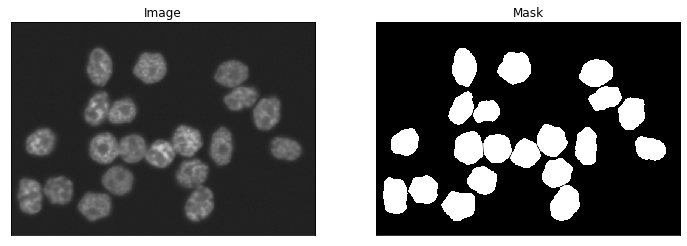

In [7]:
import cv2
import matplotlib.pyplot as plt

image_id = '0'
# load image
img_final = cv2.imread('./dataset/train/image/' + image_id + '.png')
img_label = cv2.imread('./dataset/train/mask/' + image_id + '.png')
# plot
fig, axes = plt.subplots(1, 2, figsize=(12, 12),
                         subplot_kw={'xticks': [], 'yticks': []})
axes[0].imshow(img_final)
axes[0].set_title('Image')
axes[1].imshow(img_label)
axes[1].set_title('Mask')
plt.show()

## Debug

In [8]:
import cv2

image_id = '1'
img_final = cv2.imread('./dataset/train/image/' + image_id + '.png', cv2.IMREAD_UNCHANGED)
img_final.shape

(565, 807)

### Understand Blob Detection Function

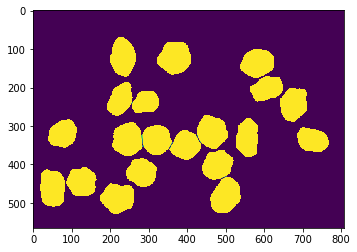

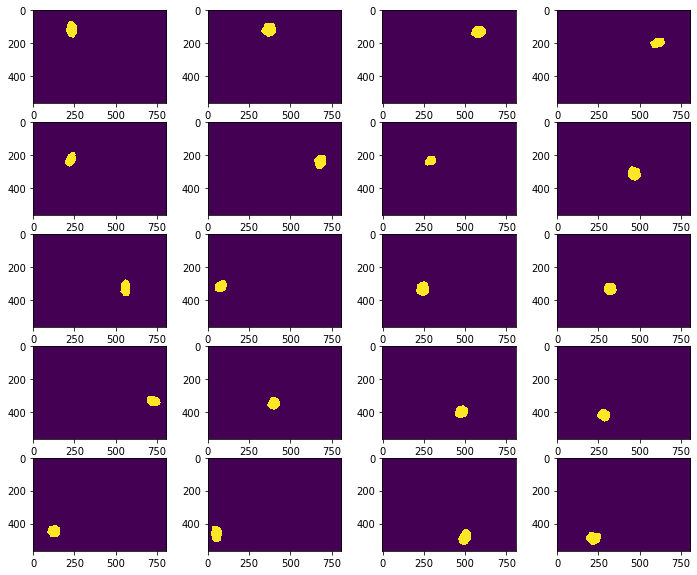

In [9]:
import cv2
import numpy as np
import copy
import pathlib
from PIL import Image
import matplotlib.pyplot as plt

def blob_detection(mask_path):
    mask = cv2.imread(mask_path, 0)
    # convert image to black and white again to make sure
    _, mask = cv2.threshold(mask, 150, 255, cv2.THRESH_BINARY)

    label = cv2.connectedComponentsWithStats(mask)
    data = copy.deepcopy(label[1])

    labels = []
    for label in np.unique(data):
        # label == 0 is background
        if label == 0:
            continue
        else:
            labels.append(label)

    mask = np.zeros((mask.shape)+(len(labels),), dtype=np.uint8)

    for n, label in enumerate(labels):
        mask[:, :, n] = np.uint8(data == label)

    cls_idxs = np.ones([mask.shape[-1]], dtype=np.int32)

    return mask, cls_idxs

def plot_layers(mask):
    # Initialize the subplot panels side by side
    fig = plt.figure(figsize=(12, 12))
    columns = 4
    rows = int(mask.shape[2] / 4) + 1
    for i in range(mask.shape[2]):
        fig.add_subplot(rows, columns, i+1)
        # fig.set_title('label'+str(i+1))
        plt.imshow(mask[:,:,i])

mask_path = './dataset/train/mask/0.png'
mask_original = cv2.imread(mask_path, 0)
plt.imshow(mask_original)

mask, cls_idxs = blob_detection(mask_path)
plot_layers(mask)
plt.show()

## Train

In [10]:
import os
import sys
import pathlib
import glob
import cv2
import numpy as np
from PIL import Image

# Root directory of the project
ROOT_DIR = os.path.abspath("/content/Mask_RCNN")
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn.model import log
from mrcnn.config import Config

class OneClassDataset(utils.Dataset):

    def load_dataset(self, dataset_dir):
        """ データセットを登録
        """
        #: データセット名、クラスID、クラス名
        self.add_class('cell_dataset', 1, 'cell')

        images = glob.glob(os.path.join(dataset_dir, "image", "*.png"))
        masks = glob.glob(os.path.join(dataset_dir, "mask", "*.png"))

        for image_path, mask_path in zip(images, masks):
            image_path = pathlib.Path(image_path)
            mask_path = pathlib.Path(mask_path)
            assert image_path.name == mask_path.name, 'データセット名不一致'

            image = Image.open(image_path)
            height = image.size[0]
            width = image.size[1]

            mask = Image.open(mask_path)
            assert image.size == mask.size, "サイズ不一致"

            self.add_image(
                'cell_dataset',
                path=image_path,
                image_id=image_path.stem,
                mask_path=mask_path,
                width=width, height=height)

    def load_mask(self, image_id):
        """マスクデータとクラスidを生成する
        """
        image_info = self.image_info[image_id]
        if image_info["source"] != 'cell_dataset':
            return super(self.__class__, self).load_mask(image_id)

        mask_path = image_info['mask_path']
        mask, cls_idxs = blob_detection(str(mask_path))

        return mask, cls_idxs

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == 'cell_dataset':
            return info
        else:
            super(self.__class__, self).image_reference(image_id)


def blob_detection(mask_path):
    mask = cv2.imread(mask_path, 0)
    #: 念のためもう一度二値化
    _, mask = cv2.threshold(mask, 150, 255, cv2.THRESH_BINARY)

    label = cv2.connectedComponentsWithStats(mask)
    data = copy.deepcopy(label[1])

    labels = []
    for label in np.unique(data):
        #: ラベル0は背景
        if label == 0:
            continue
        else:
            labels.append(label)

    mask = np.zeros((mask.shape)+(len(labels),), dtype=np.uint8)

    for n, label in enumerate(labels):
        mask[:, :, n] = np.uint8(data == label)

    cls_idxs = np.ones([mask.shape[-1]], dtype=np.int32)

    return mask, cls_idxs

Using TensorFlow backend.


In [0]:
class OneClassConfig(Config):
    # Give the configuration a recognizable name
    NAME = "cell_dataset"
    # images per batch << okay to increase this if GPU memory is big
    IMAGES_PER_GPU = 1
    # Number of classes (background + cell)
    NUM_CLASSES = 1 + 1
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 50
    VALIDATION_STEPS = 5
    # Skip object detection if confidence is 90% or low
    DETECTION_MIN_CONFIDENCE = 0.9

In [12]:
import mrcnn.model as modellib
from mrcnn import utils

# train set
TRAIN_DATASET = os.path.join('dataset', 'train')
train_set = OneClassDataset()
train_set.load_dataset(TRAIN_DATASET)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

# valid set
VALID_DATASET = os.path.join('dataset', 'valid')
test_set = OneClassDataset()
test_set.load_dataset(VALID_DATASET)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

config = OneClassConfig()

model = modellib.MaskRCNN(mode="training", config=config,
                            model_dir="./logs/model")

COCO_MODEL_PATH = './mask_rcnn_coco.h5'
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

model.load_weights(COCO_MODEL_PATH, by_name=True,
                    exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",
                            "mrcnn_bbox", "mrcnn_mask"])

# train only head
model.train(train_set, test_set,
            learning_rate=0.001,
            epochs=10,
            layers='heads')

Train: 20
Test: 10



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
box_ind is deprecated, use box_indices instead


... done downloading pretrained model!




Starting at epoch 0. LR=0.001

Checkpoint Path: ./logs/model/cell_dataset20191107T0752/mask_rcnn_cell_dataset_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_b


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "



/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the `keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/10
50/50 [==============================] - 126s 3s/step - loss: 0.9060 - rpn_class_loss: 0.0288 - rpn_bbox_loss: 0.0955 - mrcnn_class_loss: 0.2111 - mrcnn_bbox_loss: 0.2908 - mrcnn_mask_loss: 0.2799 - val_loss: 0.4508 - val_rpn_class_loss: 0.0060 - val_rpn_bbox_loss: 0.0772 - val_mrcnn_class_loss: 0.1379 - val_mrcnn_bbox_loss: 0.1172 - val_mrcnn_mask_loss: 0.1124



Epoch 2/10
50/50 [==============================] - 62s 1s/step - loss: 0.3410 - rpn_class_loss: 0.0045 - rpn_bbox_loss: 0.0468 - mrcnn_class_loss: 0.1058 - mrcnn_bbox_loss: 0.0844 - mrcnn_mask_loss: 0.0994 - val_loss: 0.3289 - val_rpn_class_loss: 0.0047 - val_rpn_bbox_loss: 0.0568 - val_mrcnn_class_loss: 0.1071 - val_mrcnn_bbox_loss: 0.0623 - val_mrcnn_mask_loss: 0.0980
Epoch 3/10
50/50 [==============================] - 62s 1s/step - loss: 0.2801 - rpn_class_loss: 0.0033 - rpn_bbox_loss: 0.0358 - mrcnn_class_loss: 0.0931 - mrcnn_bbox_loss: 0.0558 - mrcnn_mask_loss: 0.0921 - val_loss: 0.3088 - val_rpn_class_loss: 0.0027 - val_rpn_bbox_loss: 0.0476 - val_mrcnn_class_loss: 0.1043 - val_mrcnn_bbox_loss: 0.0622 - val_mrcnn_mask_loss: 0.0919
Epoch 4/10
50/50 [==============================] - 62s 1s/step - loss: 0.2685 - rpn_class_loss: 0.0029 - rpn_bbox_loss: 0.0325 - mrcnn_class_loss: 0.1005 - mrcnn_bbox_loss: 0.0446 - mrcnn_mask_loss: 0.0880 - val_loss: 0.3230 - val_rpn_class_loss: 0.00

## Validation

Test: 10



Instructions for updating:
Use `tf.cast` instead.


Instructions for updating:
Use `tf.cast` instead.


Loading weights  logs/model/cell_dataset20191107T0752/mask_rcnn_cell_dataset_0010.h5
Re-starting from epoch 10
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  213.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  109.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


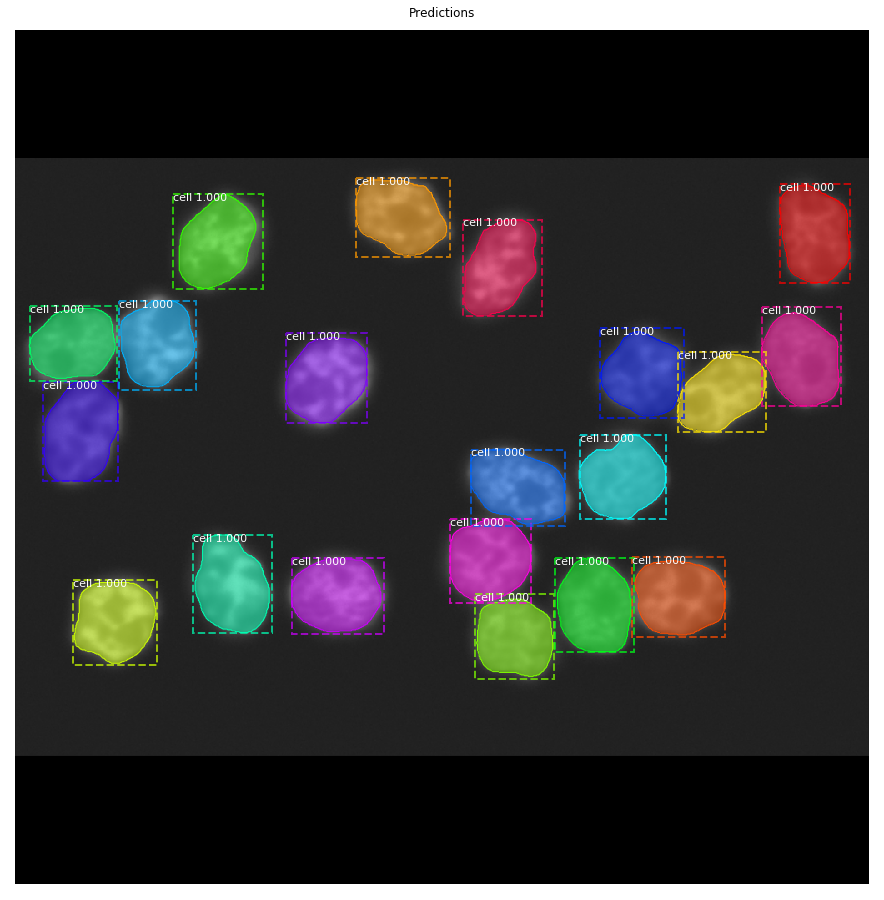

In [13]:
import random
from mrcnn import visualize

# Root directory of the project
ROOT_DIR = os.path.abspath("./Mask_RCNN")
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import visualize

class InferenceConfig(OneClassConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.5

VALID_DATASET = os.path.join('dataset', 'valid')
dataset_val = OneClassDataset()
dataset_val.load_dataset(VALID_DATASET)
dataset_val.prepare()
print('Test: %d' % len(dataset_val.image_ids))

config = InferenceConfig()
MODEL_DIR = os.path.join("logs", "model")
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                          config=config)

weights_path = model.find_last()
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

image_id = random.choice(dataset_val.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset_val, config, image_id)
info = dataset_val.image_info[image_id]

results = model.detect([image], verbose=1)

# Display results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                            dataset_val.class_names, r['scores'], ax=None,
                            title='Predictions')